# Variance, deviation, covariance and  standard deviation
Support studies for INM430 week 4

## Variance  

General formulas:  

Population 
$$\sigma^{_2} = \frac{1}{N}\sum^{N}_{i=1}(x_i - \mu)^2$$ 

Sample 
$$\sigma^{_2} = \frac{1}{n-1}\sum^{n}_{i=1}(x_i -\bar{x})^2$$

Where  

$$\mu = \frac{1}{N}\sum^{N}_{i=1}a_i$$

and

$$\bar{x} = \frac{1}{n}\sum^{n}_{i=1}a_i$$

**N** = population size, **n** = sample size, **$a_i$** = observed sample **a** at index position **i**

From [SciPy.org](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.var.html):   
"The variance is the average(mean) of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())\*\*2)."

**Worked example - population**

Given a study group population *xpop* of 5 students with heights in cm of 167, 153, 184, 190 and 165, what it the height variance in cm of *xpop*?

In [74]:
import numpy as np
# Variance with absolute observed values minus arithmetic (population) mean squared
# For more information on Numpy arrays see https://docs.scipy.org/doc/numpy/user/quickstart.html
xpop = np.array([167, 153, 184, 190, 165])
varx = np.mean(abs(xpop - xpop.mean())**2)
print ("Height variance in population xpop = " + str(varx))
# Height variance in population xpop = 180.56

Height variance in population xpop = 180.56


In [110]:
# NB Numpy built-in function .var returns population variance by default - see
# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.var.html
# ddof : int, optional
#    “Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, where N represents the number of elements. 
#    By default ddof is zero.
np.var(xpop)
# 180.56
np.var(xpop,ddof=0)
# 180.56

180.56

In [45]:
# NB abs() is not needed as difference is being squared
# Variance without absolute observed values minus mean squared, i.e. only mean of observed
# values minus mean squared
varx_no_abs = np.mean((xpop - xpop.mean())**2)
# Numpy built-in function
varx_no_abs
# 180.56

180.56

In [68]:
(xpop - xpop.mean())**2
# array([ 23.04, 353.44, 148.84, 331.24,  46.24])
sum((xpop - xpop.mean())**2)
# 902.8000000000001
# Calculate variance by "hand"
sum((xpop - xpop.mean())**2) / xpop.size
# 180.56

180.56

In [46]:
# Sanity checks
xmean = xpop.mean()
xmean
# 171.8

171.8

In [47]:
scmean = (167 + 153 + 184 + 190 + 165) / 5
if scmean == xmean:
    print("Numpy .mean function returns same value as scmean (calculated by hand)")
else:
    print("Numpy .mean function returns different value than scmean (calculated by hand)")

Numpy .mean function returns same value as scmean (calculated by hand)


In [49]:
manvar = ((xpop[0] - xmean)**2 + (xpop[1] - xmean)**2 + (xpop[2] - xmean)**2 + (xpop[3] - xmean)**2 + (xpop[4] - xmean)**2) / 5
msg = "Population Variance calculated manually = " + str(manvar)
print(msg)

Population Variance calculated manually = 180.56


In [76]:
# Sanity check: if all heights are the same expected variance equals zero
xeq = np.array([167, 167, 167, 167, 167])
varxeq = np.mean((xeq - xeq.mean())**2)
print ("Variance for a population of the same height = " + str(varxeq))
# Variance for a population of the same height = 0.0

Variance for a population of the same height = 0.0


**Worked example - sample**

Given a study group sample *xsamp* of 5 students with heights in cm of 167, 153, 184, 190 and 165, what it the height variance in cm of *xsamp*?


In [114]:
xsamp = np.array([167, 153, 184, 190, 165])
xsamp
# array([167, 153, 184, 190, 165])

array([167, 153, 184, 190, 165])

In [113]:
xsamp.size
# 5

5

In [112]:
# Using numpy built-in var function
np.var(xsamp,ddof=1)
# 225.70000000000002

225.70000000000002

In [69]:
xsampmean = np.mean(xsamp)
xsampmean
# 171.8

171.8

In [92]:
# Variance with observed values minus sample mean squared
varxsamp = np.sum((xsamp - xsampmean)**2) / (xsamp.size - 1)
print ("Height variance in sample varxsamp = " + str(varxsamp))
# Height variance in sample varxsamp = 225.70000000000002

Height variance in sample varxsamp = 225.70000000000002


## Deviation
From [Wikipedia](https://en.wikipedia.org/wiki/Deviation_(statistics))  
"In mathematics and statistics, deviation is a measure of difference between the observed value of a variable and some other value, often that variable's mean. The sign of the deviation (positive or negative), reports the direction of that difference (the deviation is positive when the observed value exceeds the reference value). The magnitude of the value indicates the size of the difference.

In statistics, the absolute deviation of an element of a data set is the absolute difference between that element and a given point. Typically the deviation is reckoned from the central value, being construed as some type of average, most often the median or sometimes the mean of the data set. 
"  

$$ D_i = |x_i-m(X)| $$


In [43]:
x = np.array([167, 153, 184, 190, 165])
x

array([167, 153, 184, 190, 165])

In [35]:
# NB numpy array x has attribute .mean
xmean = x.mean()
xmean
# 171.8

171.8

In [41]:
# NB numpy array x has no attribute .median
xmedian = np.median(x)
xmedian
# 167.0

167.0

In [39]:
# Calculate deviation for array element 1, based on mean()
abs(x[1] - xmean)
# 18.80000000000001

18.80000000000001

In [42]:
# based on median()
abs(x[1] - xmedian)
# 14.0

14.0

## Covariance

In probability theory and statistics, covariance is a measure of the joint variability of two random variables.[1] If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values, (i.e., the variables tend to show similar behavior), the covariance is positive.

Population covariance

$$\sigma(x, y) = \frac{1}{n} \sum^{n}_{i=1}{(x_i-\mu_x)(y_i-\mu_y)}$$ 

Sample covariance 

$$\sigma(x, y) = \frac{1}{n-1} \sum^{n}_{i=1}{(x_i-\bar{x})(y_i-\bar{y})}$$

where greek letter $\sigma$ (sigma) represents covariance. Notice the population means are expressed as $\mu_x, \mu_y$ (in plain english; mu of x, mu of y) while the sample means are expressed as $\bar{x}, \bar{y}$ (x bar, y bar, or in plainer english; mean of x, mean of y).

Reading sample covariance in plain english; *Covariance of x and y is the sum (represented here by capital sigma) of the index i, as i goes from one till the sample size n, multiplied by x index i minus the mean of x, multiplied by y index i minus the mean of y, divided by the sample size n minus one.*

**Worked example**

Given an MSc Data Science study group sample xsamp of 5 students with heights in cm of 167, 153, 184, 190 and 165 and final grades of 7.5, 8.9, 6.7, 5.8 and 7.2, what is the height by grade covariance in xsamp?

In [155]:
hxgarr = np.array([[167,7.5], [153, 8.9], [184, 6.7], [190, 5.8], [165, 7.2]])
hxgarr.shape
# 5 rows, 2 rows
(5, 2)

(5, 2)

In [156]:
hxgarr

array([[167. ,   7.5],
       [153. ,   8.9],
       [184. ,   6.7],
       [190. ,   5.8],
       [165. ,   7.2]])

In [184]:
# Covariance matrix - see Covariance.ipynb
np.cov(hxgarr[:,0], hxgarr[:,1])

array([[225.7  , -16.245],
       [-16.245,   1.297]])

In [168]:
# Column index 0 - Heights
hxgarr[:,0]
# array([167., 153., 184., 190., 165.])

array([167., 153., 184., 190., 165.])

In [181]:
# Variance - heights
np.cov(hxgarr[:,0])
# array(225.7)

array(225.7)

In [180]:
# Column index 1 - Grades
hxgarr[:,1]
# array([7.5, 8.9, 6.7, 5.8, 7.2])

array([7.5, 8.9, 6.7, 5.8, 7.2])

In [182]:
# Variance - grades
np.cov(hxgarr[:,1])
# array(1.297)

array(1.297)

In [179]:
# Now, the numbers
np.cov(hxgarr[:,0], hxgarr[:,1])
# array([[225.7  , -16.245],
#        [-16.245,   1.297]])
# Variance of height = 225.7, while variance of grades = 1.297

array([[225.7  , -16.245],
       [-16.245,   1.297]])


**Standard Deviation**: 


From Wikipedia - https://en.wikipedia.org/wiki/Standard_deviation

In statistics, the standard deviation (SD, also represented by the lower case Greek letter sigma σ or the Latin letter s) is a measure that is used to quantify the amount of variation or dispersion of a set of data values.[1] A low standard deviation indicates that the data points tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the data points are spread out over a wider range of values. 

The formula for the sample standard deviation is 

$$s = \sqrt{\frac{\sum_{i=1}^N (x_i - \overline{x})^2}{N-1} }$$

Noting that sample standard deviation is the square route of variance:

$$\sigma^{_2} = \frac{1}{n-1}\sum^{n}_{i=1}(x_i -\bar{x})^2$$

In [188]:
# standard deviation - heights
# variance = 180.56
# np.sqrt(180.56)
# 13.43726162579266
np.std(hxgarr[:,0])
# 13.43726162579266

13.43726162579266

In [196]:
# standard deviation - grades
# variance = 1.297
# np.var(hxgarr[:,1])
# 1.0376000000000003
# np.sqrt(1.0376000000000003)
# 1.018626526259747
np.std(hxgarr[:,1])
# 1.0186265262597476

1.0186265262597476

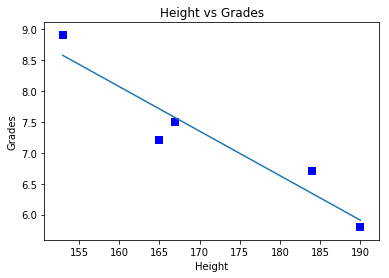

In [197]:
# First a look at the plotted data and best fit line to get a visual idea of standard deviation
import matplotlib.pyplot as plt
plt.plot(np.unique(hxgarr[:,0]), np.poly1d(np.polyfit(hxgarr[:,0], hxgarr[:,1], 1))(np.unique(hxgarr[:,0])))
plt.scatter(hxgarr[:,0],hxgarr[:,1], c = 'Blue', s = 50, linewidth = 0, marker='s')
plt.title("Height vs Grades")
plt.xlabel("Height")
plt.ylabel("Grades")
plt.show()